In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'./Mall_Customers.csv')
display(df)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop(columns=['CustomerID'],inplace=True)
st = StandardScaler()


In [4]:
df = pd.get_dummies(df)

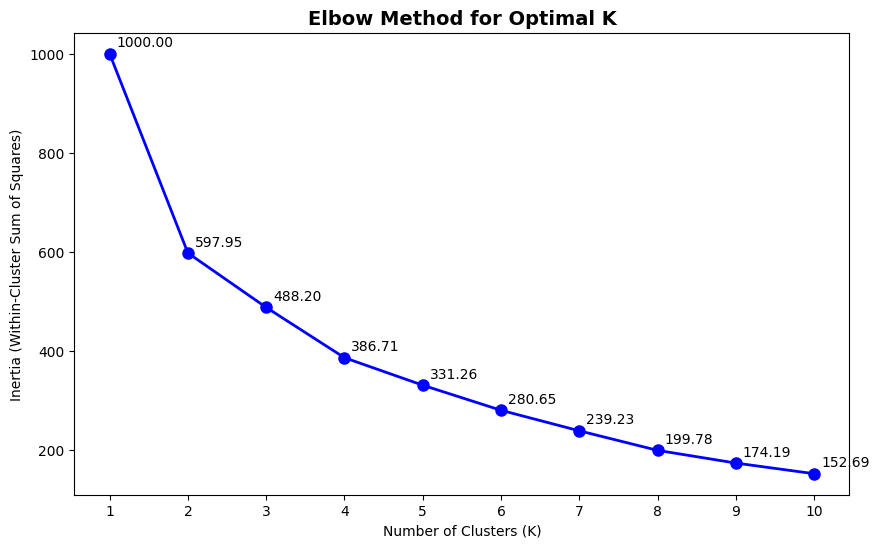

In [5]:
X_scaled = st.fit_transform(df)
iner = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X_scaled)
    iner.append(km.inertia_)

# Create the plot with points
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), iner, 'b-', marker='o', markersize=8, linewidth=2) 
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(range(1,11))

# Add value labels on each point
for i, v in enumerate(iner):
    plt.annotate(f'{v:.2f}', (i+1, v), xytext=(5, 5), textcoords='offset points')

plt.show()

In [8]:
km_optimal = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = km_optimal.fit_predict(X_scaled)
silhouette_score(X_scaled,clusters)

np.float64(0.39644160577705434)

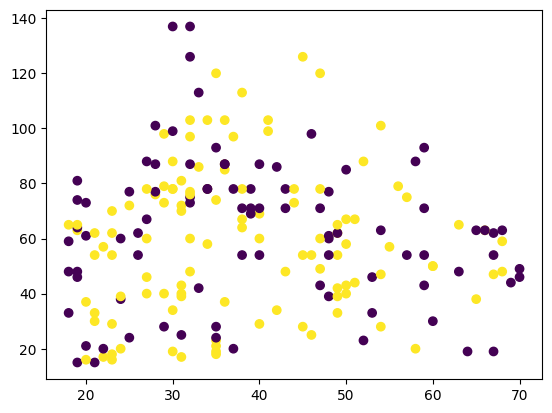

In [9]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters)
plt.show()